In [2]:
cd "/content/drive/Shareddrives/BioMed+CV: Dental Project/CRF_Check/continuity metrices"

/content/drive/Shareddrives/BioMed+CV: Dental Project/CRF_Check/continuity metrices


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!git clone https://github.com/wpf535236337/M2U-Net.git

In [3]:
cd M2U-Net

/content/drive/Shareddrives/BioMed+CV: Dental Project/CRF_Check/continuity metrices/M2U-Net


In [4]:
!pip install numpy onnx Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 76.3 MB/s eta 0:00:00


In [5]:
!pip install torchvision


(544, 544)


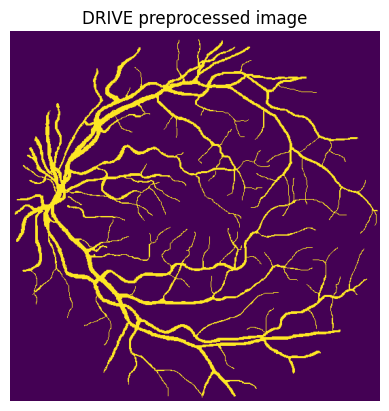

In [ ]:
from PIL import Image
import torchvision.transforms.functional as VF
import matplotlib.pyplot as plt
import numpy as np
import os
img_path = 'data/DRIVE/testt/01_manual1.gif'  # adjust this path
dataset_name = 'DRIVE'  # or 'CHASE_DB1'
# Load the image
img = Image.open(img_path)

# DRIVE preprocessing: center crop to 544×544
if dataset_name == 'DRIVE':
    img = VF.center_crop(img, (544, 544))

# CHASE_DB1 preprocessing: horizontal crop from 18 to 978
elif dataset_name == 'CHASE_DB1':
    img = np.array(img)
    img = img[:, 18:978]
    img = Image.fromarray(img)

# Convert to PyTorch tensor
img_tensor = VF.to_tensor(img)
gt_array =img_tensor.squeeze(0).numpy()
print(gt_array.shape)
plt.imshow(np.transpose(gt_array, (0,1)))
plt.title(f'{dataset_name} preprocessed image')
plt.axis('off')
plt.show()

In [ ]:
from PIL import Image
import torchvision.transforms.functional as VF
import numpy as np
import os

# Directory containing 1st_manual ground truth images
gt_dir = 'data/DRIVE/test/'
dataset_name = 'DRIVE'

# Output directory to save preprocessed GT arrays (optional: use same dir)
save_dir = gt_dir  # or another path if needed

# List all .gif files
gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith('.gif')])

for gt_file in gt_files:
    img_path = os.path.join(gt_dir, gt_file)
    img = Image.open(img_path)

    # Preprocessing
    if dataset_name == 'DRIVE':
        img = VF.center_crop(img, (544, 544))
    elif dataset_name == 'CHASE_DB1':
        img = np.array(img)
        img = img[:, 18:978]
        img = Image.fromarray(img)

    # Convert to tensor and extract NumPy array
    img_tensor = VF.to_tensor(img)
    gt_array = img_tensor.squeeze(0).numpy()  # shape: (H, W), values 0–1

    # Optional: Binarize (convert 0–1 float to int)
    gt_array = (gt_array > 0.5).astype(np.uint8)

    # Save as .npy
    save_path = os.path.join(save_dir, gt_file.replace('.gif', '.npy'))
    np.save(save_path, gt_array)

    print(f"Saved {save_path}")


Saved data/DRIVE/test/01_manual1.npy
Saved data/DRIVE/test/02_manual1.npy
Saved data/DRIVE/test/03_manual1.npy
Saved data/DRIVE/test/04_manual1.npy
Saved data/DRIVE/test/05_manual1.npy
Saved data/DRIVE/test/06_manual1.npy
Saved data/DRIVE/test/07_manual1.npy
Saved data/DRIVE/test/08_manual1.npy
Saved data/DRIVE/test/09_manual1.npy
Saved data/DRIVE/test/10_manual1.npy
Saved data/DRIVE/test/11_manual1.npy
Saved data/DRIVE/test/12_manual1.npy
Saved data/DRIVE/test/13_manual1.npy
Saved data/DRIVE/test/14_manual1.npy
Saved data/DRIVE/test/15_manual1.npy
Saved data/DRIVE/test/16_manual1.npy
Saved data/DRIVE/test/17_manual1.npy
Saved data/DRIVE/test/18_manual1.npy
Saved data/DRIVE/test/19_manual1.npy
Saved data/DRIVE/test/20_manual1.npy


In [ ]:
!python benchmark_pytorch.py \
  --model M2UNet \
  --state_dict models/M2UNet_DRIVE.pth \
  --dataset DRIVE \
  --threshold 0.5 \
  --devicename cpu \
  --batch_size 1 \
  --save_prob 1 \
  --save_binary_mask 1


Batch 1/20 inference time per image: 0.65408s
Batch 2/20 inference time per image: 0.37737s
Batch 3/20 inference time per image: 0.39867s
Batch 4/20 inference time per image: 0.40770s
Batch 5/20 inference time per image: 0.37500s
Batch 6/20 inference time per image: 0.35825s
Batch 7/20 inference time per image: 0.39350s
Batch 8/20 inference time per image: 0.39733s
Batch 9/20 inference time per image: 0.40448s
Batch 10/20 inference time per image: 0.34675s
Batch 11/20 inference time per image: 0.35029s
Batch 12/20 inference time per image: 0.36981s
Batch 13/20 inference time per image: 0.34229s
Batch 14/20 inference time per image: 0.39184s
Batch 15/20 inference time per image: 0.36056s
Batch 16/20 inference time per image: 0.36043s
Batch 17/20 inference time per image: 0.47121s
Batch 18/20 inference time per image: 0.56049s
Batch 19/20 inference time per image: 0.50655s
Batch 20/20 inference time per image: 0.50629s

Mean inference time per image: 0.40415s


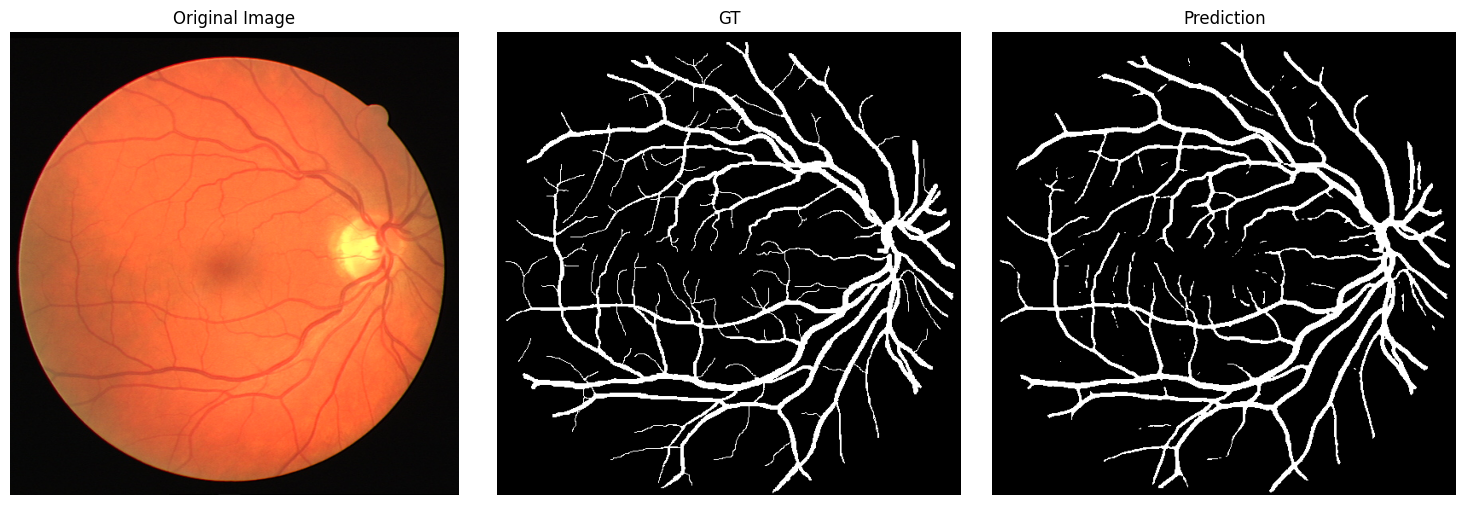

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = 2

# --- Load predicted binary mask (output from model) ---
pred_path = f'data/DRIVE/predictions/{image:02d}_test_vessel_binary.gif'
pred = Image.open(pred_path).convert('L')
pred_array = np.array(pred)

# --- Load ground truth manual segmentation ---
gt_array = np.load(f'data/DRIVE/testt/{image:02d}_manual1.npy')  # or .png depending on dataset
# gt_path = Image.open(gt_path).convert('L')
# gt_array = np.array(gt_path)

# --- Optional: Load the original input image too (for reference) ---
orig_path = f'data/DRIVE/testt/images/{image:02d}_test.tif'
orig = Image.open(orig_path)
orig_array = np.array(orig)


# --- Display side-by-side ---
plt.figure(figsize=(15, 5))

# Original image
plt.subplot(1, 3, 1)
plt.imshow(orig_array)
plt.title("Original Image")
plt.axis('off')

# Ground Truth
plt.subplot(1, 3, 2)
# plt.imshow(gt_array, cmap='gray')
# plt.title("Ground Truth")
# plt.axis('off')
#plt.imshow(np.transpose(gt_array, (0,1)),cmap='gray')
plt.imshow(np.transpose(gt_array, (0,1)), cmap='gray')
plt.title("GT")
plt.axis('off')

# Prediction
plt.subplot(1, 3, 3)
plt.imshow(pred_array, cmap='gray')
plt.title("Prediction")
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(gt_array.shape)
print(pred_array.shape)
print(orig_array.shape)

(544, 544)
(544, 544)
(584, 565, 3)


In [ ]:
#BINARY
from PIL import Image
import numpy as np

binary_img = Image.open('data/DRIVE/predictions/01_test_vessel_binary.gif').convert('L')
binary_array = np.array(binary_img)  # Values: 0 (background) or 255 (vessels)
print(binary_array)
# Optional: binarize if needed
binary_array = (binary_array > 127).astype(np.uint8)
np.sum(binary_array == 1) + np.sum(binary_array == 0) #295936

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


np.int64(295936)

In [ ]:
#PROBABILITY OUTPUT
prob_img = Image.open('data/DRIVE/predictions/01_test_vessel_prob.gif').convert('L')
prob_array = np.array(prob_img)  # Grayscale values: 0–255 (probability)
print(prob_array)
print(prob_array[271,54])
# Optional: normalize to [0, 1]
prob_array = prob_array / 255.0
print(prob_array[271,54])
print(binary_array[271,54])
print(gt_array[271,54])

[[42 42 42 ... 42 42 42]
 [38 41 42 ... 42 41 32]
 [40 42 42 ... 42 41 48]
 ...
 [40 42 42 ... 42 47 53]
 [40 42 42 ... 42 51 53]
 [39 42 42 ... 33 34 60]]
234
0.9176470588235294
1
0


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Flatten
gt_flat = gt_array.flatten()
pred_flat = binary_array.flatten()

# Metrics
accuracy = accuracy_score(gt_flat, pred_flat)
precision = precision_score(gt_flat, pred_flat)
recall = recall_score(gt_flat, pred_flat)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8041096723615917
Precision: 0.14394675619165415
Recall: 0.14465818289434745


In [ ]:
def dice_score(gt, pred):
    intersection = np.sum(gt * pred)
    return (2. * intersection) / (np.sum(gt) + np.sum(pred))

print("Dice:", dice_score(gt_array, binary_array))

from skimage.morphology import skeletonize

def cldice(gt, pred):
    # Skeletons
    S_gt = skeletonize(gt)
    S_pred = skeletonize(pred)

    # Soft connectivity
    tprec = np.sum(S_pred * gt) / (np.sum(S_pred) + 1e-8)
    tsens = np.sum(S_gt * pred) / (np.sum(S_gt) + 1e-8)

    return (2 * tprec * tsens) / (tprec + tsens + 1e-8)

print("clDice:", cldice(gt_array, binary_array))



Dice: 0.14430159269045123
clDice: 0.14899057824545994


In [6]:
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.morphology import skeletonize
from scipy.ndimage import binary_fill_holes, distance_transform_edt
from skimage.measure import label

# ---------- clDice Function ----------
def cldice(gt, pred):
    S_gt = skeletonize(gt)
    S_pred = skeletonize(pred)
    tprec = np.sum(S_pred * gt) / (np.sum(S_pred) + 1e-8)
    tsens = np.sum(S_gt * pred) / (np.sum(S_gt) + 1e-8)
    return (2 * tprec * tsens) / (tprec + tsens + 1e-8)

# ---------- IoU Function ----------
def iou_score(gt, pred):
    intersection = np.sum(gt * pred)
    union = np.sum(gt) + np.sum(pred) - intersection
    return intersection / (union + 1e-8)

# ---------- Dice Function ----------
def dice_score(gt, pred):
    intersection = np.sum(gt * pred)
    return (2. * intersection) / (np.sum(gt) + np.sum(pred) + 1e-8)

# --- Betti numbers computation function ---
def betti_numbers(mask):
    mask = mask.astype(bool)
    b0 = label(mask, connectivity=1).max()  # number of connected components
    filled = binary_fill_holes(mask)        # fill holes
    holes = filled ^ mask                   # holes = filled - original
    b1 = label(holes, connectivity=1).max() # number of holes
    return b0, b1

def chamfer_distance(mask1, mask2):
    mask1 = mask1.astype(bool)
    mask2 = mask2.astype(bool)

    dist1 = distance_transform_edt(~mask1)
    dist2 = distance_transform_edt(~mask2)

    chamfer1 = dist2[mask1].mean()
    chamfer2 = dist1[mask2].mean()

    return (chamfer1 + chamfer2) / 2.0

# ---------- Initialize accumulators ----------
gt_all = []
pred_all = []

dice_list = []
cldice_list = []
chamfer_list = []
iou_list = []

# ---------- Loop over all 20 test cases ----------
for i in range(1, 21):
    # Load ground truth
    gt_path = f'data/DRIVE/testt/{i:02d}_manual1.npy'
    gt = np.load(gt_path)

    # Load prediction
    binary_img = Image.open(f'data/DRIVE/predictions/M2UNET_pretrain/{i:02d}_test_vessel_binary.gif').convert('L')
    binary_array = np.array(binary_img)
    pred_array = (binary_array > 127).astype(np.uint8)

    # Flatten for sklearn metrics
    gt_all.extend(gt.flatten())
    pred_all.extend(pred_array.flatten())

    # Dice and clDice per image
    dice_list.append(dice_score(gt, pred_array))
    cldice_list.append(cldice(gt, pred_array))
    chamfer_list.append(chamfer_distance(gt, pred_array))
    iou_list.append(iou_score(gt, pred_array))

# ---------- Compute Overall Metrics ----------
gt_all = np.array(gt_all)
pred_all = np.array(pred_all)

accuracy = accuracy_score(gt_all, pred_all)
precision = precision_score(gt_all, pred_all)
recall = recall_score(gt_all, pred_all)
dice = np.mean(dice_list)
iou_mean = np.mean(iou_list)
cl_dice = np.mean(cldice_list)
chamfer_mean = np.mean(chamfer_list)
# Compute Betti numbers
b0_gt, b1_gt = betti_numbers(gt_all)
b0_pred, b1_pred = betti_numbers(pred_all)

# ---------- Print Results ----------
print(f"Overall Accuracy : {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall   : {recall:.4f}")
print(f"Mean Dice        : {dice:.4f}")
print(f"Mean clDice      : {cl_dice:.4f}")
print(f"Mean IoU         : {iou_mean:.4f}")
print(f"Mean ChamferDist : {chamfer_mean:.4f}")
print(f"Ground Truth - B0: {b0_gt}, B1: {b1_gt}")
print(f"Prediction   - B0: {b0_pred}, B1: {b1_pred}")


Overall Accuracy : 0.9624
Overall Precision: 0.8027
Overall Recall   : 0.8153
Mean Dice        : 0.8084
Mean clDice      : 0.8158
Mean IoU         : 0.6787
Mean ChamferDist : 0.4897
Ground Truth - B0: 114144, B1: 114143
Prediction   - B0: 91400, B1: 91399


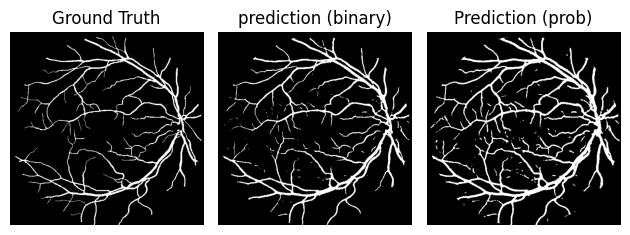

Accuracy:  0.9620
Precision: 0.7146
Recall:    0.8928
Dice:      0.7938
clDice:    0.8558
Chamfer Dist:    0.4258
Betti-0 (connected components): 155
Betti-1 (holes): 30
GT-Betti-0 (connected components): 136
GT-Betti-1 (holes): 35


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from torchvision.transforms.functional import center_crop

from skimage.measure import label
from scipy.ndimage import binary_fill_holes, distance_transform_edt
import scipy.ndimage as ndi

image = 20

gt_path = f'data/DRIVE/testt/{image:02d}_manual1.gif'
gt = Image.open(gt_path).convert('L')
gt = center_crop(gt, (544, 544))
gt_array = np.array(gt)

b_path = f'data/DRIVE/predictions/M2UNET_pretrain/{image:02d}_test_vessel_binary.gif'
b = Image.open(b_path).convert('L')
b_array = np.array(b)

p_path = f'data/DRIVE/predictions/M2UNET_pretrain/{image:02d}_test_vessel_prob.gif'
p = Image.open(p_path).convert('L')
p_array = np.array(p)/ 255.0
p_array = (p_array > 0.25).astype(np.uint8)

plt.subplot(1, 3, 1)
plt.title('Ground Truth')
plt.imshow(gt_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('prediction (binary)')
plt.imshow(b_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Prediction (prob)')
plt.imshow(p_array, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

from skimage.morphology import skeletonize

def compute_skeleton(mask):
    return skeletonize(mask > 0)

def cl_dice(pred, gt):
    pred = pred.astype(bool)
    gt = gt.astype(bool)

    pred_skel = compute_skeleton(pred)
    gt_skel = compute_skeleton(gt)

    # Intersection over skeletons
    tprec = (pred[gt_skel]).sum() / (gt_skel.sum() + 1e-8)
    tsens = (gt[pred_skel]).sum() / (pred_skel.sum() + 1e-8)

    return 2 * tprec * tsens / (tprec + tsens + 1e-8)

def betti_numbers(mask):
    """
    Compute Betti numbers for a 2D binary mask.
    """
    # Ensure binary mask
    mask = mask.astype(bool)
    # B0 = number of connected components
    b0 = label(mask, connectivity=1).max()
    # Fill holes to get b1
    filled = binary_fill_holes(mask)
    holes = filled ^ mask  # XOR gives holes
    # B1 = number of holes (connected components in holes)
    b1 = label(holes, connectivity=1).max()

    return b0, b1

def chamfer_distance(mask1, mask2):
    """
    Compute symmetric Chamfer Distance between two binary masks.
    """
    mask1 = mask1.astype(bool)
    mask2 = mask2.astype(bool)

    # Compute distance maps
    dist1 = distance_transform_edt(~mask1)
    dist2 = distance_transform_edt(~mask2)

    # Chamfer from mask1 to mask2
    chamfer1 = dist2[mask1].mean()
    chamfer2 = dist1[mask2].mean()

    return (chamfer1 + chamfer2) / 2.0

# Load ground truth
gt_path = f"data/DRIVE/testt/{image:02d}_manual1.gif"
gt = Image.open(gt_path).convert("L")
gt = center_crop(gt, (544, 544))
gt = np.array(gt)
gt = (gt > 127).astype(np.uint8)  # binarize

# Load prediction
pred_path = f"data/DRIVE/predictions/M2UNET_pretrain/{image:02d}_test_vessel_binary.gif"
pred = np.array(Image.open(pred_path).convert("L"))
pred = (pred > 127).astype(np.uint8)  # binarize

gt_tensor = torch.from_numpy(gt).long().flatten()
pred_tensor = torch.from_numpy(pred).long().flatten()

acc = accuracy_score(gt_tensor, pred_tensor)
prec = precision_score(gt_tensor, pred_tensor, zero_division=0)
rec = recall_score(gt_tensor, pred_tensor, zero_division=0)
dice = f1_score(gt_tensor, pred_tensor, zero_division=0)  # Dice is F1 in binary case
cldice = cl_dice(pred, gt)
chamfer = chamfer_distance(pred, gt)

# Print
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"Dice:      {dice:.4f}")
print(f"clDice:    {cldice:.4f}")
print(f"Chamfer Dist:    {chamfer:.4f}")

b0, b1 = betti_numbers(pred)
gtb0, gtb1 = betti_numbers(gt)
print(f"Betti-0 (connected components): {b0}")
print(f"Betti-1 (holes): {b1}")
print(f"GT-Betti-0 (connected components): {gtb0}")
print(f"GT-Betti-1 (holes): {gtb1}")

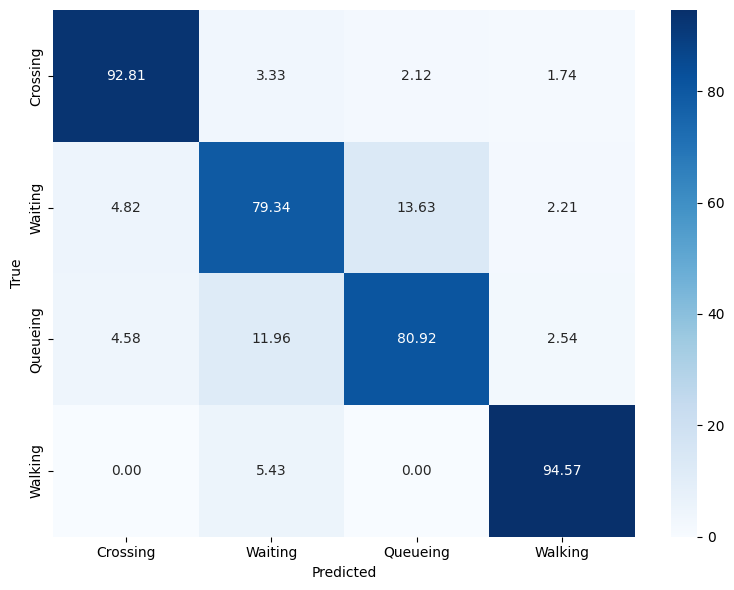

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Labels and confusion matrix values
labels = ["Crossing", "Waiting", "Queueing", "Walking"]
confusion_matrix = np.array([
    [92.81, 3.33, 2.12, 1.74],
    [4.82, 79.34, 13.63, 2.21],
    [4.58, 11.96, 80.92, 2.54],
    [0.00, 5.43, 0.00, 94.57]
])

# Create a dataframe for seaborn
df_cm = pd.DataFrame(confusion_matrix, index=labels, columns=labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, fmt=".2f", cmap="Blues", cbar=True)
# plt.title("Confusion Matrix")
plt.ylabel("True")
plt.xlabel("Predicted")
plt.tight_layout()
plt.show()

In [ ]:
!pip install -U openmim
!mim install mmcv

In [ ]:
%cd M2U-Net
!pip install torch torchvision pillow numpy

/content/drive/Shareddrives/BioMed+CV: Dental Project/CRF_Check/continuity metrices/M2U-Net
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 789.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 110.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82


In [ ]:
from torch.utils.data import random_split, DataLoader
from dataset import RetinaDataset, get_file_lists
from pathlib import Path

# === TRAINING SETUP ===
train_image_dir = Path('data/DRIVE/training/images/')
train_file_paths = get_file_lists(train_image_dir)

# Create full dataset (includes image, label, mask)
full_dataset = RetinaDataset(train_file_paths, dataset='DRIVE')

# Split 85% train / 15% validation
val_size = int(0.15 * len(full_dataset))
train_size = len(full_dataset) - val_size
train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size])

# DataLoaders
train_loader = DataLoader(train_dataset, batch_size=4, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1)

# === TEST SETUP ===
test_image_dir = Path('data/DRIVE/test/images/')
test_file_paths = get_file_lists(test_image_dir)
test_dataset = RetinaDataset(test_file_paths, dataset='DRIVE')
test_loader = DataLoader(test_dataset, batch_size=1)



In [ ]:
import torch
from m2unet import m2unet
from dataset import RetinaDataset, get_file_lists
from pathlib import Path
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Model
model = m2unet().to(device)

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr=1e-3)

# BCE loss
bce_loss = nn.BCEWithLogitsLoss()

# Jaccard index (soft version for logits)
def jaccard_index(pred, target, smooth=1e-8):
    pred = torch.sigmoid(pred)
    intersection = (pred * target).sum(dim=(1,2,3))
    union = pred.sum(dim=(1,2,3)) + target.sum(dim=(1,2,3)) - intersection
    j = (intersection + smooth) / (union + smooth)
    return j.mean()

In [ ]:
# Training loop
num_epochs = 300
best_val_dice = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch in train_loader:
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        masks  = batch['mask'].to(device)

        optimizer.zero_grad()
        outputs = model(images)

        # Combined loss
        loss_bce = bce_loss(outputs, labels)
        jaccard = jaccard_index(outputs, labels)
        loss = loss_bce + 0.3 * (1 - jaccard)

        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

    model.eval()
    dice_list = []

    with torch.no_grad():
      for batch in val_loader:
        images = batch['image'].to(device)
        labels = batch['label'].to(device)
        masks  = batch['mask'].to(device)

        outputs = model(images)
        preds = torch.sigmoid(outputs) > 0.5

        # Dice only in valid FOV
        intersection = ((preds * labels) * masks).sum()
        union = ((preds + labels) * masks).sum()
        dice = (2.0 * intersection + 1e-8) / (union + 1e-8)
        dice_list.append(dice.item())

    val_dice = sum(dice_list) / len(dice_list)
    print(f"Validation Dice: {val_dice:.4f}")

    # Save best model
    if val_dice > best_val_dice:
        best_val_dice = val_dice
        torch.save(model.state_dict(), 'm2unet_drive_best.pth')
        print("Model saved!")

print("Training complete.")


Epoch [1/300], Loss: 1.0253
Validation Dice: 0.0002
Model saved!
Epoch [2/300], Loss: 0.9889
Validation Dice: 0.0632
Model saved!
Epoch [3/300], Loss: 0.9680
Validation Dice: 0.1842
Model saved!
Epoch [4/300], Loss: 0.9495
Validation Dice: 0.2356
Model saved!
Epoch [5/300], Loss: 0.9389
Validation Dice: 0.0642
Epoch [6/300], Loss: 0.9210
Validation Dice: 0.2654
Model saved!
Epoch [7/300], Loss: 0.9095
Validation Dice: 0.2312
Epoch [8/300], Loss: 0.8932
Validation Dice: 0.2387
Epoch [9/300], Loss: 0.8747
Validation Dice: 0.3314
Model saved!
Epoch [10/300], Loss: 0.8682
Validation Dice: 0.3594
Model saved!
Epoch [11/300], Loss: 0.8666
Validation Dice: 0.3671
Model saved!
Epoch [12/300], Loss: 0.8516
Validation Dice: 0.4022
Model saved!
Epoch [13/300], Loss: 0.8472
Validation Dice: 0.4883
Model saved!
Epoch [14/300], Loss: 0.8399
Validation Dice: 0.5242
Model saved!
Epoch [15/300], Loss: 0.8321
Validation Dice: 0.4851
Epoch [16/300], Loss: 0.8251
Validation Dice: 0.5182
Epoch [17/300], Lo

In [ ]:
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import functional as VF
from pathlib import Path
from PIL import Image
import numpy as np
import time

def test_model(model, dataloader, device, threshold=0.5,
               save_dir="predictions", save_prob=True, save_binary=True):
    """
    Evaluate the model on test set and save results.

    Args:
        model (nn.Module): Trained model.
        dataloader (DataLoader): Test data loader.
        device (torch.device): Computation device.
        threshold (float): Threshold for binary mask.
        save_dir (str): Directory to save outputs.
        save_prob (bool): Whether to save probability maps.
        save_binary (bool): Whether to save binary masks.
    """
    model.eval()
    model.to(device)
    sigmoid = torch.nn.Sigmoid()

    # Create save directories
    save_dir = Path(save_dir)
    if save_prob:
        (save_dir / "probability").mkdir(parents=True, exist_ok=True)
    if save_binary:
        (save_dir / "binary").mkdir(parents=True, exist_ok=True)

    with torch.no_grad():
        for idx, batch in enumerate(dataloader):
            img = batch['image'].to(device)  # [B, C, H, W]
            base_names = batch.get("file_name", [f"img_{idx}"])  # custom handling

            start_time = time.perf_counter()

            output = model(img)  # raw logits
            prob = sigmoid(output)  # [B, 1, H, W]
            pred_bin = (prob > threshold).float()

            elapsed = (time.perf_counter() - start_time) / img.size(0)
            print(f"Batch {idx + 1}/{len(dataloader)} inference time per image: {elapsed:.4f}s")

            for b in range(img.size(0)):
                file_base = base_names[b] if isinstance(base_names[b], str) else f"img_{idx}_{b}"

                if save_prob:
                    prob_img = VF.to_pil_image(prob[b].cpu())
                    prob_img.save(save_dir / "probability" / f"{file_base}_prob.gif")

                if save_binary:
                    binary_img = VF.to_pil_image(pred_bin[b].cpu())
                    binary_img.save(save_dir / "binary" / f"{file_base}_binary.gif")


In [ ]:
# Load model
model = m2unet().to(device)  # or your model class
model.load_state_dict(torch.load('m2unet_drive_best.pth', map_location='cpu'))  # or your device

# Run test
test_model(model, test_loader, device, threshold=0.5, save_dir='data/DRIVE/predictions', save_prob=True, save_binary=True)


Batch 1/20 inference time per image: 0.0082s
Batch 2/20 inference time per image: 0.0067s
Batch 3/20 inference time per image: 0.0060s
Batch 4/20 inference time per image: 0.0060s
Batch 5/20 inference time per image: 0.0071s
Batch 6/20 inference time per image: 0.0061s
Batch 7/20 inference time per image: 0.0062s
Batch 8/20 inference time per image: 0.0060s
Batch 9/20 inference time per image: 0.0062s
Batch 10/20 inference time per image: 0.0060s
Batch 11/20 inference time per image: 0.0059s
Batch 12/20 inference time per image: 0.0061s
Batch 13/20 inference time per image: 0.0081s
Batch 14/20 inference time per image: 0.0063s
Batch 15/20 inference time per image: 0.0058s
Batch 16/20 inference time per image: 0.0058s
Batch 17/20 inference time per image: 0.0063s
Batch 18/20 inference time per image: 0.0086s
Batch 19/20 inference time per image: 0.0060s
Batch 20/20 inference time per image: 0.0066s


In [ ]:
import numpy as np
from PIL import Image
from sklearn.metrics import accuracy_score, precision_score, recall_score
from skimage.morphology import skeletonize
from torchvision.transforms.functional import center_crop

# ---------- clDice Function ----------
def cldice(gt, pred):
    S_gt = skeletonize(gt)
    S_pred = skeletonize(pred)
    tprec = np.sum(S_pred * gt) / (np.sum(S_pred) + 1e-8)
    tsens = np.sum(S_gt * pred) / (np.sum(S_gt) + 1e-8)
    return (2 * tprec * tsens) / (tprec + tsens + 1e-8)

# ---------- Dice Function ----------
def dice_score(gt, pred):
    intersection = np.sum(gt * pred)
    return (2. * intersection) / (np.sum(gt) + np.sum(pred) + 1e-8)

# ---------- Initialize accumulators ----------
gt_all = []
pred_all = []

dice_list = []
cldice_list = []

# ---------- Loop over all 20 test cases ----------
for i in range(1, 21):
    case_id = f"{i:02d}"

    # Load ground truth
    gt_path = f"data/DRIVE/test/1st_manual/{case_id}_manual1.gif"
    gt = Image.open(gt_path).convert("L")
    gt = center_crop(gt, (544, 544))
    gt = np.array(gt)
    gt = (gt > 127).astype(np.uint8)  # binarize

    # Load prediction
    pred_path = f"data/DRIVE/predictions/binary/img_{i-1}_binary.gif"
    pred = np.array(Image.open(pred_path).convert("L"))
    pred = (pred > 127).astype(np.uint8)  # binarize

    # Flatten for sklearn metrics
    gt_all.extend(gt.flatten())
    pred_all.extend(pred.flatten())

    # Dice and clDice per image
    dice_list.append(dice_score(gt, pred))
    cldice_list.append(cldice(gt, pred))

# ---------- Compute Overall Metrics ----------
gt_all = np.array(gt_all)
pred_all = np.array(pred_all)

accuracy = accuracy_score(gt_all, pred_all)
precision = precision_score(gt_all, pred_all)
recall = recall_score(gt_all, pred_all)
dice = np.mean(dice_list)
cl_dice = np.mean(cldice_list)

# ---------- Print Results ----------
print(f"Overall Accuracy : {accuracy:.4f}")
print(f"Overall Precision: {precision:.4f}")
print(f"Overall Recall   : {recall:.4f}")
print(f"Mean Dice        : {dice:.4f}")
print(f"Mean clDice      : {cl_dice:.4f}")


Overall Accuracy : 0.9521
Overall Precision: 0.7459
Overall Recall   : 0.7724
Mean Dice        : 0.7580
Mean clDice      : 0.7583


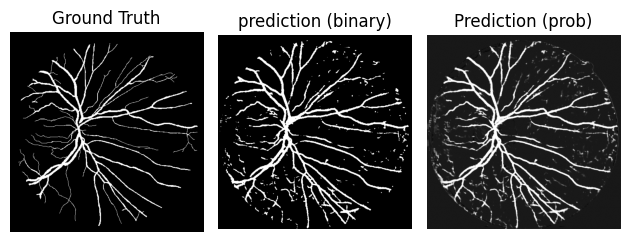

Accuracy:  0.9444
Precision: 0.6081
Recall:    0.8527
Dice:      0.7099
clDice:    0.7394
Betti-0 (connected components): 281
Betti-1 (holes): 21


In [ ]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import torch
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

from skimage.measure import label
from scipy.ndimage import binary_fill_holes
import scipy.ndimage as ndi

image = 15

gt_path = f'data/DRIVE/test/1st_manual/{image:02d}_manual1.gif'
gt = Image.open(gt_path).convert('L')
gt_array = np.array(gt)

b_path = f'data/DRIVE/predictions/binary/img_{image-1}_binary.gif'
b = Image.open(b_path).convert('L')
b_array = np.array(b)

p_path = f'data/DRIVE/predictions/probability/img_{image-1}_prob.gif'
p = Image.open(p_path).convert('L')
p_array = np.array(p)

plt.subplot(1, 3, 1)
plt.title('Ground Truth')
plt.imshow(gt_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('prediction (binary)')
plt.imshow(b_array, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Prediction (prob)')
plt.imshow(p_array, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

from skimage.morphology import skeletonize

def compute_skeleton(mask):
    return skeletonize(mask > 0)

def cl_dice(pred, gt):
    pred = pred.astype(bool)
    gt = gt.astype(bool)

    pred_skel = compute_skeleton(pred)
    gt_skel = compute_skeleton(gt)

    # Intersection over skeletons
    tprec = (pred[gt_skel]).sum() / (gt_skel.sum() + 1e-8)
    tsens = (gt[pred_skel]).sum() / (pred_skel.sum() + 1e-8)

    return 2 * tprec * tsens / (tprec + tsens + 1e-8)

def betti_numbers(mask):
    """
    Compute Betti numbers for a 2D binary mask.
    """
    # Ensure binary mask
    mask = mask.astype(bool)
    # B0 = number of connected components
    b0 = label(mask, connectivity=1).max()
    # Fill holes to get b1
    filled = binary_fill_holes(mask)
    holes = filled ^ mask  # XOR gives holes
    # B1 = number of holes (connected components in holes)
    b1 = label(holes, connectivity=1).max()

    return b0, b1

# Load ground truth
gt_path = f"data/DRIVE/test/1st_manual/{image:02d}_manual1.gif"
gt = Image.open(gt_path).convert("L")
gt = center_crop(gt, (544, 544))
gt = np.array(gt)
gt = (gt > 127).astype(np.uint8)  # binarize

# Load prediction
pred_path = f"data/DRIVE/predictions/binary/img_{image-1}_binary.gif"
pred = np.array(Image.open(pred_path).convert("L"))
pred = (pred > 127).astype(np.uint8)  # binarize

gt_tensor = torch.from_numpy(gt).long().flatten()
pred_tensor = torch.from_numpy(pred).long().flatten()

acc = accuracy_score(gt_tensor, pred_tensor)
prec = precision_score(gt_tensor, pred_tensor, zero_division=0)
rec = recall_score(gt_tensor, pred_tensor, zero_division=0)
dice = f1_score(gt_tensor, pred_tensor, zero_division=0)  # Dice is F1 in binary case
cldice = cl_dice(pred, gt)

# Print
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"Dice:      {dice:.4f}")
print(f"clDice:    {cldice:.4f}")

b0, b1 = betti_numbers(pred)
print(f"Betti-0 (connected components): {b0}")
print(f"Betti-1 (holes): {b1}")